**Package scientitstools**

Analyse Factorielle des Correspondances

Ce tutoriel de présenter rapidement les principales fonctionnalités offertes par le package _scientisttools_ pour réaliser une Analyse Factorielle des Correspondances




## Format des données

les données doivent être un tableau de contingence. Nous utiliserons lejeu de données [housetasks](https://rdrr.io/cran/factoextra/man/housetasks.html) disponible dasn le package [factoextra](https://cran.r-project.org/web/packages/factoextra/index.html) R.

(https://vincentarelbundock.github.io/Rdatasets/datasets.html)

In [1]:
# Load R datasets in Python
def load_rdatasets(packages=str,data_name=str):
    from rpy2.robjects.packages import importr, data
    import pandas as pd
    import numpy as np
    r_df = data(importr(packages)).fetch(data_name)[data_name]
    py_df = pd.DataFrame.from_dict({ key : np.asarray(r_df.rx2(key)) for key in r_df.names })
    py_df.index = r_df.rownames
    return py_df

In [2]:
# Données housetasks
housetasks = load_rdatasets(packages="factoextra",data_name="housetasks")
print(housetasks)

Unable to determine R home: [WinError 2] Le fichier spécifié est introuvable


            Wife  Alternating  Husband  Jointly
Laundry      156           14        2        4
Main_meal    124           20        5        4
Dinner        77           11        7       13
Breakfeast    82           36       15        7
Tidying       53           11        1       57
Dishes        32           24        4       53
Shopping      33           23        9       55
Official      12           46       23       15
Driving       10           51       75        3
Finances      13           13       21       66
Insurance      8            1       53       77
Repairs        0            3      160        2
Holidays       0            1        6      153


In [3]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotnine as pn
from scientisttools import (
    CA,
    plotCA,
    get_eig,
    get_eigenvalue,
    get_ca,
    get_ca_row,
    get_ca_col,
    fviz_screeplot)

c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.


## Code R pour l'AFC

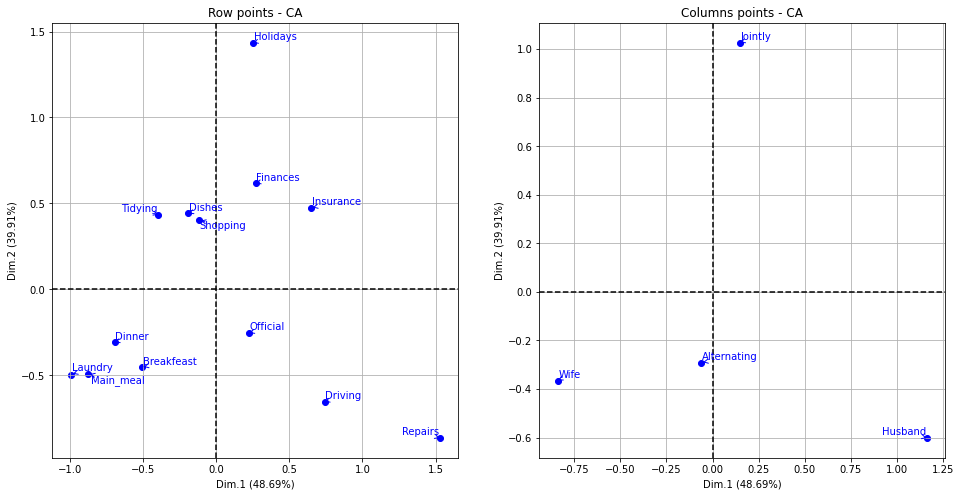

In [4]:
my_ca = CA(n_components=None,
           row_labels=housetasks.index.values,
           col_labels=housetasks.columns.values,figsize=(16,8)).fit(housetasks)

In [5]:
print(get_eigenvalue(my_ca))

       eigenvalue  difference  proportion  cumulative
Dim.1    0.542889    0.097887   48.692221   48.692221
Dim.2    0.445003    0.317954   39.912692   88.604913
Dim.3    0.127048         NaN   11.395087  100.000000


Le graphique des valeurs propres peut être produit à l'aide de la fonction *plot_eigenvalues* ou _fviz_screeplot_

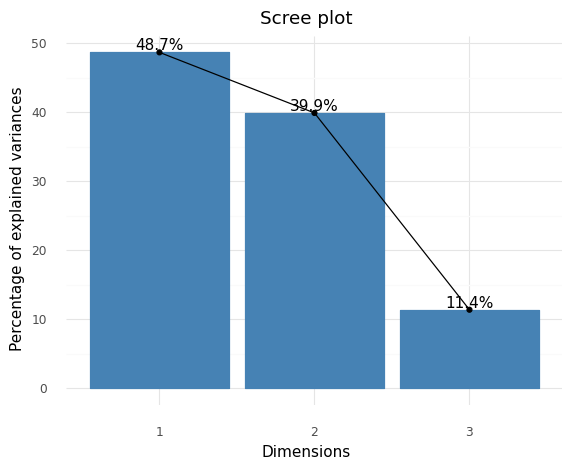

In [6]:
p = fviz_screeplot(my_ca,add_labels=True,choice="proportion")
print(p)

Le point auquel le graphique des valeurs propres montre un virage (appelé "coude") peut être considéré comme indiquant le nombre optimal d'axes principaux à retenir.

Il est également possible de calculer une valeur propre moyenne au - dessus de laquelle l'axe doit être conservé dans le résultat.

---
**_NOTE_**

Nos données contiennent $13$ lignes et $4$ colonnes.

Si les données étaient aléatoires, lavaleur attendue de la valeur propre pour chaque axe serait :


\begin{equation}
\dfrac{1}{I-1} = \dfrac{1}{13-1} = \dfrac{1}{12}=8.33\%
\end{equation}

en termes de lignes.

De même, l'axe moyen devrait représenter 

\begin{equation}
\dfrac{1}{J-1} = \dfrac{1}{4-1} = \dfrac{1}{3}=33.33\%
\end{equation}

en termes de colonnes.

---

Selon

> **_NOTE:_**  Tout axe avec une contribution supérieure au maximum de ces deux pourcentages devrait être considéré comme important et inclus dans la solution pour l'interprétation des données.

Le code **python** ci - dessous, montre le graphique des valeurs propres

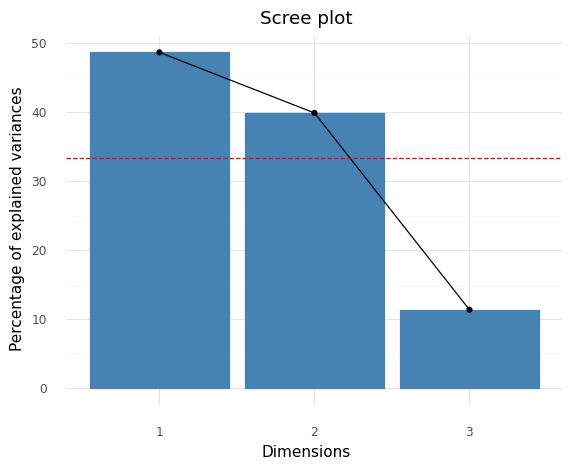

In [7]:
# 
p = fviz_screeplot(my_ca,add_labels=False,choice="proportion",add_kaiser=False)
p = p + pn.geom_hline(yintercept = 33.33,linetype="--",color="red") 
print(p)

## Graphique des points lignes

### Résultats

La fonction *get_ca_row()* est utilisée pour extraire les résultats pour les lignes. Cette fonction renvoie un dictionnaire contenant les coordonnées, les cos2 et les contributions.

In [8]:
print(help(get_ca_row))

Help on function get_ca_row in module scientisttools.get_ca:

get_ca_row(self) -> dict
    self. : an instance of class CA
    
    Returns
    -------
    Correspondence Analysis - Results for rows
        Name        Description
    1   "coord"     "coordinates for the rows"
    2   "cos2"      "cos2 for the rows"
    3   "constrib"  "contributions of the rows"
    4   "dist"      "Rows distance"
    5   "res.dist"  "Restitued distance"
    6   "infos"     "additionnal informations for the rows:"
                        - distance between rows and inertia
                        - weight for the rows
                        - inertia for the rows

None


In [9]:
# Informations sur les points lignes
row = get_ca_row(my_ca)
print(row.keys())

dict_keys(['coord', 'cos2', 'contrib', 'dist', 'res.dist', 'infos'])


---
Les composantes de la fonction *get_ca_row()* peuvent être utilisés dans le graphique des lignes comme suit:
- *row["coord"]* : coordonnées des lignes
---

### Coordonnées des points lignes

In [10]:
print(row["coord"].head(6))

               Dim.1     Dim.2     Dim.3
Laundry    -0.991837 -0.495322 -0.316729
Main_meal  -0.875585 -0.490109 -0.164065
Dinner     -0.692574 -0.308104 -0.207414
Breakfeast -0.508600 -0.452804  0.220405
Tidying    -0.393808  0.434344 -0.094214
Dishes     -0.188964  0.441966  0.266949


Utilisez la fonction _plotCA()_ pour visualiser

NameError: name 'plotCA' is not defined

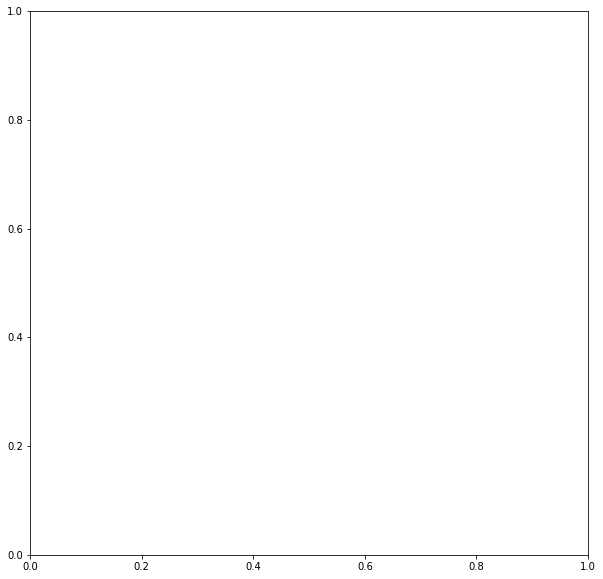

In [12]:
fig, axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,repel=True)

#### Qualité de représentation des lignes

In [ ]:
print(row["cos2"].head(6))

In [ ]:
plotCA(my_ca,color="cos2",repel=True)

In [ ]:
my_ca.plot_cos2(choice="ind",axis=0)

##### Contribution des lignes aux dimensions

In [ ]:
print(row["contrib"].head(6))

In [ ]:
fig, (axe1,axe2) = plt.subplots(1,2,figsize=(16,6))
my_ca.plot_contrib(choice="ind",axis=0,ax=axe1)
my_ca.plot_contrib(choice="ind",axis=1,add_mean=False,ax=axe2)
plt.show()

In [ ]:
plotCA(my_ca,color="contrib",repel=True)

## Graphique des colonnes

### Résultats

In [ ]:
col = get_ca_col(my_ca)
print(help(get_ca_col))

In [ ]:
# coord
print(col["coord"])

#### Graphiques : qualité et contribution